In [1]:
#import important libraries
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/fassi182/NBA-Players-Performance-Dataset/refs/heads/main/nba_2016_2017_100.csv")

In [3]:
df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,...,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,...,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,...,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,...,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,...,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470


In [4]:
df.shape

(100, 63)

In [5]:
# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

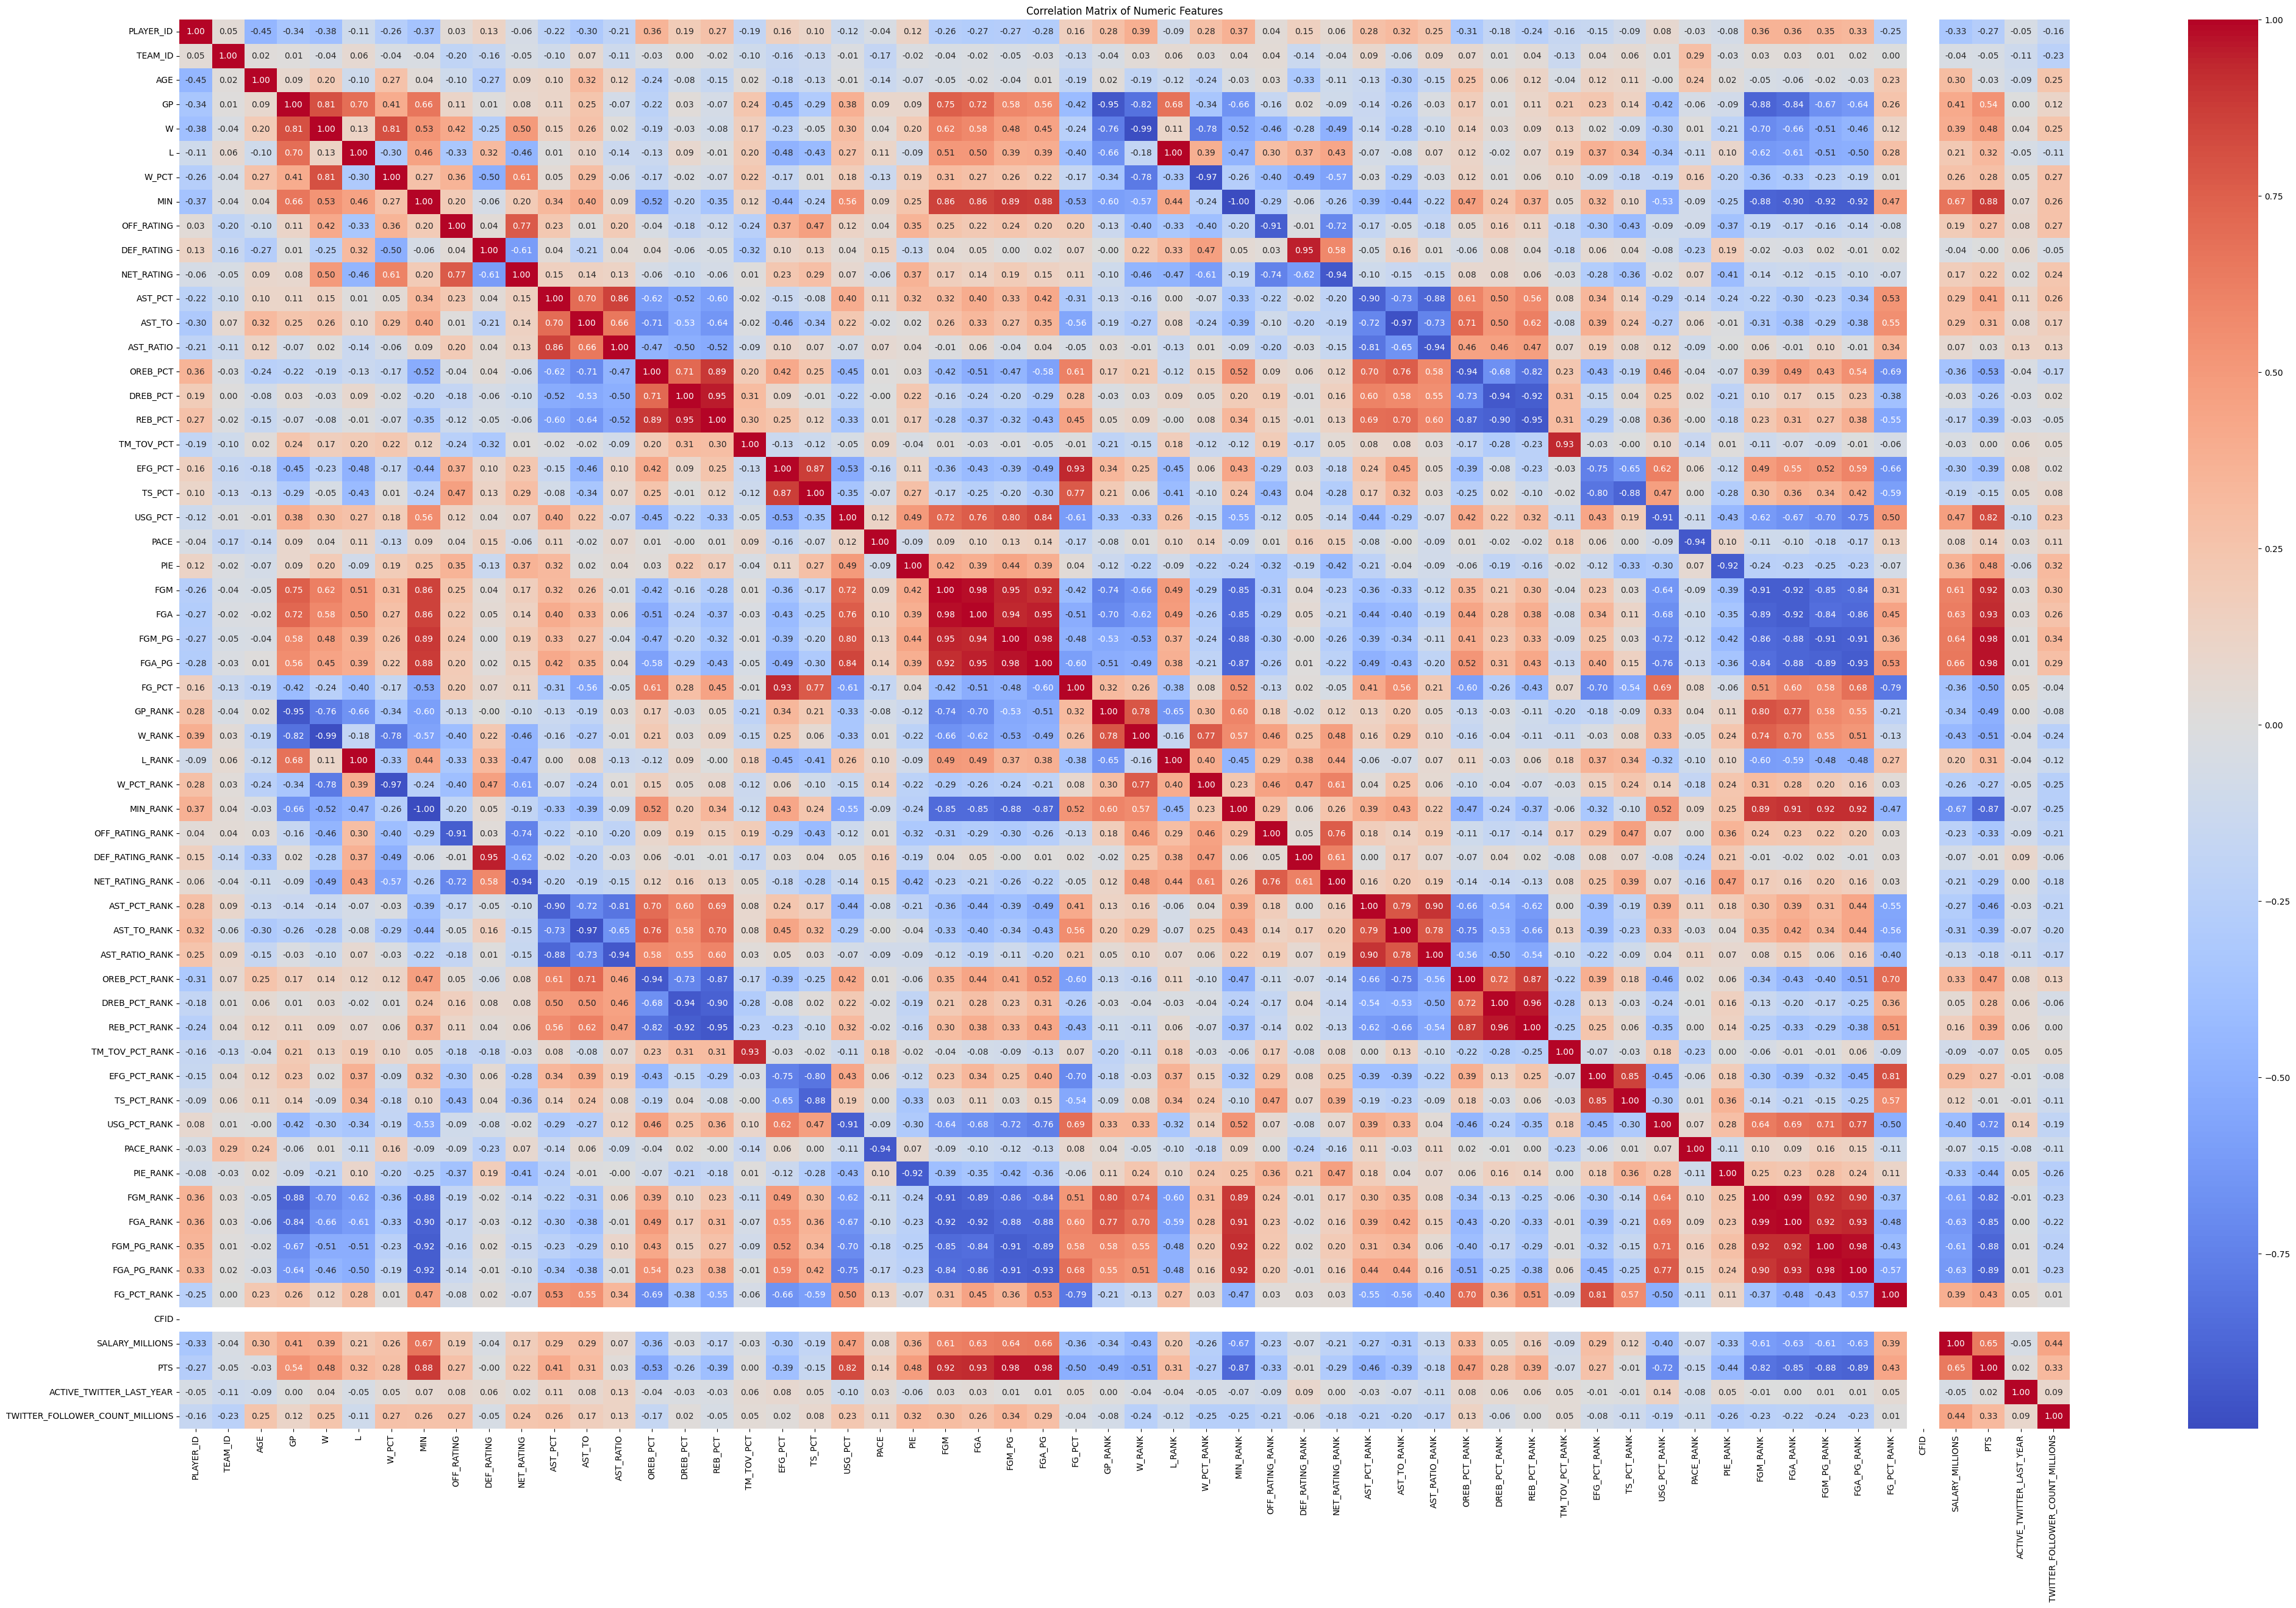

In [6]:

# Visualize the correlation matrix
plt.figure(figsize=(50, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [7]:
# Define features and target variable
features = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'AST_PCT', 'REB_PCT', 'USG_PCT', 'TS_PCT']
target = 'PTS'

In [8]:
# Drop rows with missing values in selected columns
df_model = df[features + [target]].dropna()

In [9]:
# Separate features and target
X = df_model[features]
y = df_model[target]

In [10]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [12]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [13]:
# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [14]:
# Evaluate Linear Regression model
lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
print(f"\nLinear Regression - R^2 Score: {lr_r2:.4f}")
print(f"Linear Regression - Mean Absolute Error: {lr_mae:.4f}")



Linear Regression - R^2 Score: 0.9591
Linear Regression - Mean Absolute Error: 1.3479


In [15]:
# Evaluate Ridge Regression model
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
print(f"\nRidge Regression - R^2 Score: {ridge_r2:.4f}")
print(f"Ridge Regression - Mean Absolute Error: {ridge_mae:.4f}")


Ridge Regression - R^2 Score: 0.9620
Ridge Regression - Mean Absolute Error: 1.3031


In [16]:
# Analyze feature importance from Ridge Regression model
coefficients = pd.Series(ridge_model.coef_, index=features)
coefficients_sorted = coefficients.sort_values()

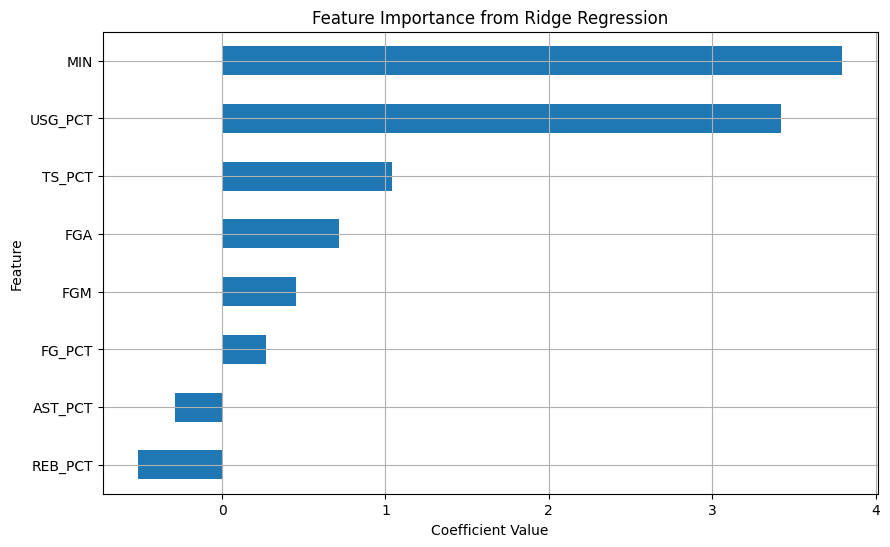

In [17]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
coefficients_sorted.plot(kind='barh')
plt.title('Feature Importance from Ridge Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()